# Objetivo:

- Prever a coluna cliente

Métrica: F1-score


Neste desafio separei os dados de treino, em treino e teste e validação.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
train = pd.read_csv('/content/drive/MyDrive/comp_FLAI/treino.csv')
submission = pd.read_csv('/content/drive/MyDrive/comp_FLAI/teste.csv')

train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente
0,Female,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,Normal
1,Female,0,Yes,Yes,59,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,Premium
2,Female,0,Yes,Yes,68,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),Premium
3,Female,0,No,Yes,35,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,Premium
4,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,Normal


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 non-null   object
 17  Cliente       

# Pré-processamento dos dados

Aqui transformei as colunas categóricas em colunas numéricas.

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()


transform = train.dtypes[train.dtypes == 'object'].keys()
for col in transform:
    if col !="Cliente":
      train[col] = encoder.fit_transform(list(train[col].values.astype('str')))
    


dic_cliente = {'Normal':0,'Premium':1}
train['ClienteId']=train['Cliente'].map(dic_cliente)

train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,ClienteId
0,0,0,0,0,20,1,0,2,1,1,1,1,1,1,2,0,3,Normal,0
1,0,0,1,1,59,1,2,0,2,2,0,2,0,0,1,0,3,Premium,1
2,0,0,1,1,68,0,1,0,0,2,2,2,2,2,2,0,1,Premium,1
3,0,0,0,1,35,1,2,0,0,0,0,0,0,0,0,0,3,Premium,1
4,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,Normal,0


# Machine Learning


Separar o dataset "train" em dados de treino, teste e validação.


O dataset dados_ml foi para treinar e avaliar o modelo, e no dataset validação irei utilzar o modelo escolhido para fazer as predições ates de realizar a submissão

In [31]:
dados_ml = train.iloc[:2000]
dados_validacao=train.iloc[2000:]

# dados_ml = train.sample(n=2000)
# dados_validacao=train.sample(n=500)

In [32]:
dados_ml.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,ClienteId
1995,0,1,0,0,19,1,0,1,2,2,0,2,2,2,0,1,3,Premium,1
1996,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,Normal,0
1997,1,0,0,0,31,1,2,1,0,0,0,2,0,0,1,0,1,Premium,1
1998,1,0,1,1,67,1,2,0,2,0,2,0,2,2,2,1,2,Premium,1
1999,0,0,0,0,4,1,0,0,2,0,0,0,0,0,0,1,0,Normal,0


In [33]:
dados_validacao.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,ClienteId
2000,0,0,1,0,72,1,2,1,0,2,2,2,2,2,1,0,1,Premium,1
2001,1,0,1,1,4,1,0,0,0,0,0,2,0,2,0,0,1,Normal,0
2002,1,0,1,0,2,1,2,1,0,0,2,0,2,0,0,1,2,Normal,0
2003,1,0,1,1,55,1,0,2,1,1,1,1,1,1,1,0,3,Normal,0
2004,1,0,1,0,31,1,2,1,2,2,0,2,0,0,0,1,1,Premium,1


In [34]:
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report,confusion_matrix,f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold

In [56]:
X=dados_ml.drop(columns=['Cliente','ClienteId'],axis=1)
y=dados_ml['ClienteId']

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,y,shuffle=True,test_size=0.7,random_state=42)

# Benchmark

In [57]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 54.07%


# Testando outros modelos

In [58]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



from sklearn.model_selection import cross_val_score,KFold

lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  cv=KFold(n_splits=10, random_state=0, shuffle=True)
  clf.fit(X_treino, Y_treino)
  # train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=cv)
  # test_acc = clf.score(X_teste, Y_teste)
  # print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  # print('Teste:', test_acc)

  print('F1 Score')

  y_pred_treino = clf.predict(X_treino)
  f1_treino = f1_score(Y_treino, y_pred_treino)
  print('Treino', f1_treino)

  y_pred_teste = clf.predict(X_teste)
  f1_teste = f1_score(Y_teste,y_pred_teste)
  print('Test', f1_teste)
  print('='*80)

LogisticRegression
Validation score 0.8949999999999999
F1 Score
Treino 0.8918406072106262
Test 0.8764227642276423
GaussianNB
Validation score 0.885
F1 Score
Treino 0.8690476190476192
Test 0.886762360446571
DecisionTreeClassifier
Validation score 0.9616666666666667
F1 Score
Treino 1.0
Test 0.9486356340288924
RandomForestClassifier
Validation score 0.9649999999999999
F1 Score
Treino 1.0
Test 0.9538702111024238
XGBClassifier
Validation score 0.9666666666666666
F1 Score
Treino 1.0
Test 0.9631949882537196


# Ajustando o XGBClassifier

In [38]:
import xgboost as xgb

In [39]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)

X=dados_ml.drop(columns=['Cliente','ClienteId'],axis=1)
y=dados_ml['ClienteId']



f1_lista=[]
for i,(tr,ts) in enumerate(kf.split(X)):
    Xtr, ytr = X.iloc[tr], y.iloc[tr]
    Xval, yval = X.iloc[ts], y.iloc[ts]
    
    clf = xgb.XGBClassifier(seed=42)
    clf.fit(Xtr,ytr)
    
    y_pred=clf.predict(Xval)

    f1_score_ = f1_score(yval,y_pred)
    f1_lista.append(f1_score_)
    print('Fold: {}'.format(i))
    # print('-'*60)
    print('F1_Score: {:.4f}'.format(f1_score_))
    # print(classification_report(yval, y_pred))
    print('='*40)

f1_medio=np.mean(f1_lista)
print('F1 Score médio: {:.4f}'.format(f1_medio))


Fold: 0
F1_Score: 1.0000
Fold: 1
F1_Score: 0.9892
Fold: 2
F1_Score: 0.9727
Fold: 3
F1_Score: 0.9840
Fold: 4
F1_Score: 0.9814
Fold: 5
F1_Score: 0.9834
Fold: 6
F1_Score: 0.9825
Fold: 7
F1_Score: 0.9836
Fold: 8
F1_Score: 0.9703
Fold: 9
F1_Score: 0.9939
F1 Score médio: 0.9841


F1 Score do XGBCLassifier foi: 0.9939
A acurácia do XGBCLassifier foi 99.50%


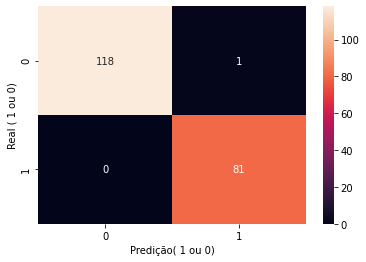

In [44]:
cm=confusion_matrix(yval, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
y_pred = clf.predict(Xval)
f1_score_xgb = f1_score(yval,y_pred)
print('F1 Score do XGBCLassifier foi: {:.4f}'.format(f1_score_xgb))

acuracia = clf.score(Xval, yval) * 100
print('A acurácia do XGBCLassifier foi %.2f%%' % acuracia)


plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
plt.show()

# Fazendo predições para os dados de validação

Neste tópico ajustei o modelo aos dados já treinados anteriormente(dados_ml) e fiz predições para os dados_validacao.

In [45]:
dados_validacao.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,ClienteId
2000,0,0,1,0,72,1,2,1,0,2,2,2,2,2,1,0,1,Premium,1
2001,1,0,1,1,4,1,0,0,0,0,0,2,0,2,0,0,1,Normal,0
2002,1,0,1,0,2,1,2,1,0,0,2,0,2,0,0,1,2,Normal,0
2003,1,0,1,1,55,1,0,2,1,1,1,1,1,1,1,0,3,Normal,0
2004,1,0,1,0,31,1,2,1,2,2,0,2,0,0,0,1,1,Premium,1


In [46]:
X_val=dados_validacao.drop(columns=['Cliente','ClienteId'],axis=1)
y_val=dados_validacao['ClienteId']

In [47]:
# kf = KFold(n_splits=10,random_state=0,shuffle=True)

X=dados_ml.drop(columns=['Cliente','ClienteId'],axis=1)
y=dados_ml['ClienteId']

clf = xgb.XGBClassifier()
clf.fit(X,y)
    
y_pred_validacao=clf.predict(X_val)


f1_score_xgb_validacao=f1_score(y_val,y_pred_validacao)

print('F1 Score do XGBCLassifier na validação foi: {:.4f}'.format(f1_score_xgb_validacao))

F1 Score do XGBCLassifier na validação foi: 0.9776


# Submission

Predições para os dados de teste.

Neste tópco foi ecesssário um pequeno pré-processamento dos dados para realizar as predições.

In [48]:
submission.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
2,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
3,Female,0,No,No,48,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
4,Male,0,Yes,No,71,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check


In [49]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 non-null   object
dtypes: int64(2), o

In [50]:
transform_2 = submission.dtypes[submission.dtypes == 'object'].keys()
for col in transform_2:
  submission[col] = encoder.fit_transform(list(submission[col].values.astype('str')))
    

submission.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,1,23,1,0,2,1,1,1,1,1,1,1,0,3
1,0,0,0,0,27,1,0,0,2,2,0,0,0,0,0,1,3
2,1,0,0,0,2,1,0,2,1,1,1,1,1,1,0,0,3
3,0,0,0,0,48,1,0,1,2,0,2,2,2,2,2,1,1
4,1,0,1,0,71,1,0,1,0,2,2,2,2,2,2,1,2


In [54]:
previsao=clf.predict(submission)

subm = pd.DataFrame()
subm['Cliente'] = previsao
subm.to_csv('submissão_robert_ferro_02.csv', index = False)

In [55]:
subm.head()

,Cliente
0,0
1,0
2,0
3,1
4,1
